ANN

Yapay Sinir Ağları (ANN) ile Rakam Tanıma

---

1.   İş Problemleri (Business Problem) 
2.   Veriyi Anlamak (Data Understanding)
3.   Veriyi Hazırlamak (Data Preparation)
4.   Modelleme (Modeling)
5.   Değerlendirme (Evaluation)


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")


In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim Seti Boyutu", x_train.shape, y_train.shape)

Eğitim Seti Boyutu (60000, 28, 28) (60000,)


In [ ]:
num_labels=len(np.unique(y_train))

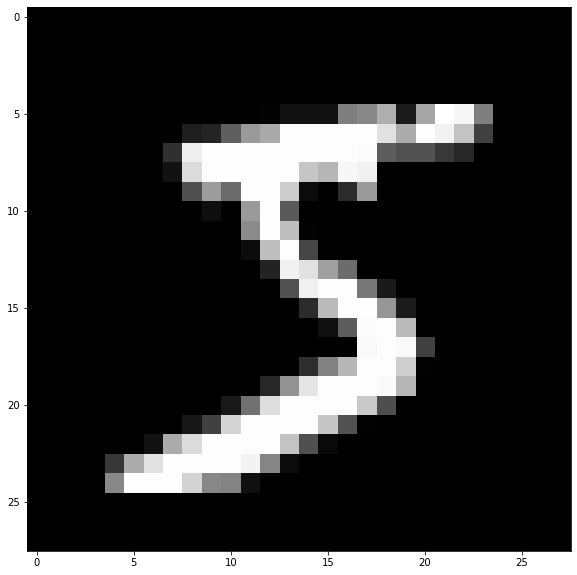

In [ ]:
# Veri setinden örnekler gösterilmesi:

plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap="gray")

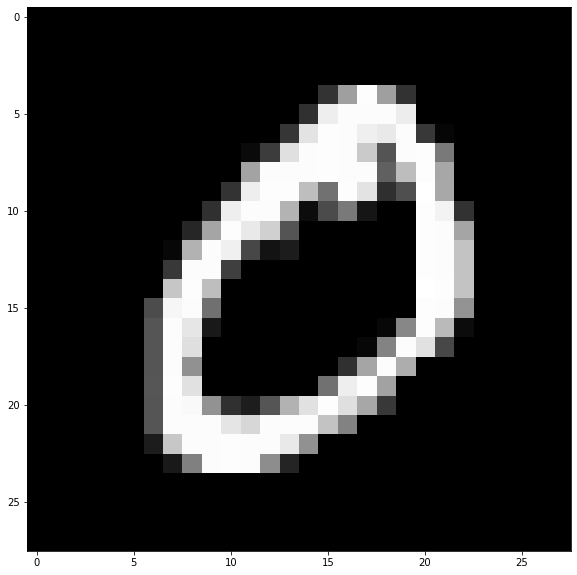

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap="gray")

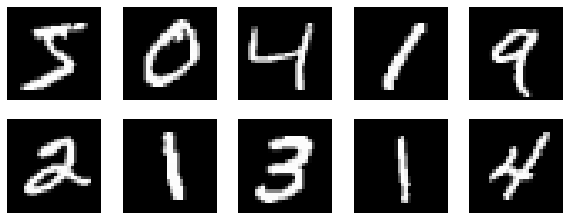

In [ ]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax=plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap="gray")
  plt.axis("off")

In [ ]:
# bu yaptığımız işlemi sonra daha rahat kullanmak için fonksiyon haline getiriyoruz:

def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap="gray")
    plt.axis("off")

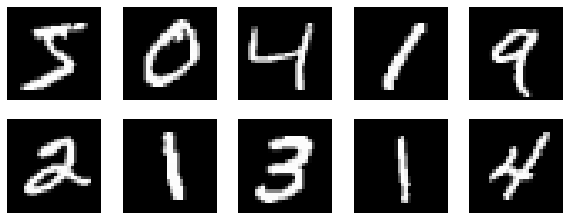

In [ ]:
visualize_img(x_train)

In [ ]:
# Ekranda bir görüntü gördüğümüzde RGB renklerine göre yapılmıştır bu.
# Örn: r:250 g:10 b:240 -> mor 
# 0-255 arası değer alır her biri.
# İnternette rgb calculator kullanabilirsin renklerin değerleri için.
# rgb(255,255,255)->beyaz | rgb(0,0,0)->siyah


In [ ]:
x_train[2] #Burada gördüğümüz üzere resimler de numeric olarak saklanıyor sadece bize görsel hali görünüyor.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[2][14,10] #2. görselin 14,10 . pixellerdeki renklerin değerleri.

49

In [ ]:
# Elimizdeki veriyi görselleştirebilmek için fonksiyon yazacağız:

def pixel_visualize(img):
  fix=plt.figure(figsize=(12,12))
  ax = plt.subplot(111)
  ax.imshow(img, cmap="gray")
  width, height=img.shape
  
  threshold=img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  color="white" if img[x][y]<threshold else "black")

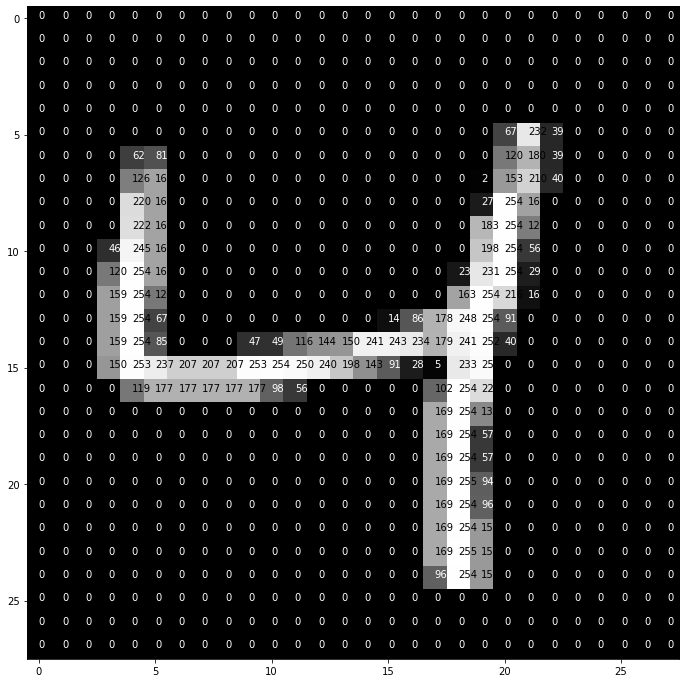

In [ ]:
pixel_visualize(x_train[2])

In [ ]:
# Veriyi Hazırlama (Data Preparation)

In [ ]:
# Encoding part

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Reshaping part

In [ ]:
image_size=x_train.shape[1]
image_size

28

In [ ]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


In [ ]:
# Elimizdeki pixelleri 0 ile 1 arasına konumlandıracağız. Bunun nedeni ml modelinin hızlanması.

In [ ]:
# Standardization

In [ ]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [ ]:
# Modellleme:

In [ ]:
model= tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu", name="layer1"),
    Dense(units=num_labels, activation="softmax", name="otput_layer")
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 otput_layer (Dense)         (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0614 - precision: 0.9850 - recall: 0.9792 - accuracy: 0.9823 - val_loss: 0.0822 - val_precision: 0.9788 - val_recall: 0.9712 - val_accuracy: 0.9742
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0512 - precision: 0.9879 - recall: 0.9831 - accuracy: 0.9854 - val_loss: 0.0760 - val_precision: 0.9797 - val_recall: 0.9734 - val_accuracy: 0.9768
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0437 - precision: 0.9893 - recall: 0.9856 - accuracy: 0.9873 - val_loss: 0.0792 - val_precision: 0.9796 - val_recall: 0.9741 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0356 - precision: 0.9919 - recall: 0.9886 - accuracy: 0.9902 - val_loss: 0.0772 - val_precision: 0.9796 - val_recall: 0.9746 - val_accuracy: 0.9767
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0304 - precision: 0.9933 - r

In [ ]:
# Model başarısı değerlendirme

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0115 - precision: 0.9979 - recall: 0.9973 - accuracy: 0.9976 - val_loss: 0.0778 - val_precision: 0.9809 - val_recall: 0.9776 - val_accuracy: 0.9791
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0102 - precision: 0.9982 - recall: 0.9976 - accuracy: 0.9979 - val_loss: 0.0782 - val_precision: 0.9803 - val_recall: 0.9782 - val_accuracy: 0.9792
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0093 - precision: 0.9983 - recall: 0.9979 - accuracy: 0.9981 - val_loss: 0.0784 - val_precision: 0.9804 - val_recall: 0.9786 - val_accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0067 - precision: 0.9991 - recall: 0.9989 - accuracy: 0.9990 - val_loss: 0.0779 - val_precision: 0.9813 - val_recall: 0.9793 - val_accuracy: 0.9801
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0063 - precision: 0.9989 - 

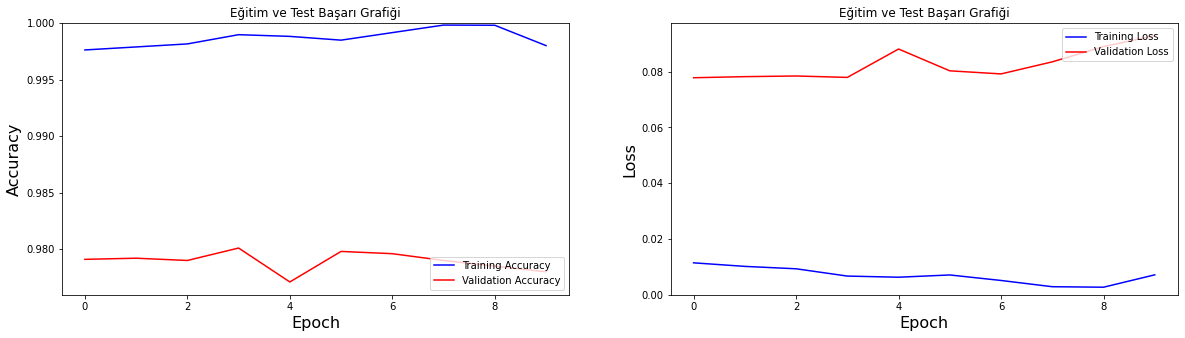

In [ ]:
# Accuracy ve Loss Grafikleri

# Grafik 1 Accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"],color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarı Grafiği")

# Grafik 1 Loss

plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b", label="Training Loss")
plt.plot(history.history["val_loss"],color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Başarı Grafiği")
plt.show()

In [ ]:
# Bu grafiklerde epoch sayısıyla accuracy(başarılı sınıflandırma oranı) ve loss değerlerinin arasındaki bağlantıyı görüyoruz.

In [ ]:
loss, precision, recall, acc= model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.lf%%" % (100.0 * acc))
print("\nTest Loss: %.lf%%" % (100.0 * loss))
print("\nTest Precision: %.lf%%" % (100.0 * precision))
print("\nTest Recall: %.lf%%" % (100.0 * recall))


Test Accuracy: 98%

Test Loss: 9%

Test Precision: 98%

Test Recall: 98%


In [ ]:
# Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [ ]:
model.save("mnist_model.h5")

In [ ]:
import random

random=random.randint(0,x_test.shape[0])

In [ ]:
random

4800

In [ ]:
test_image=x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

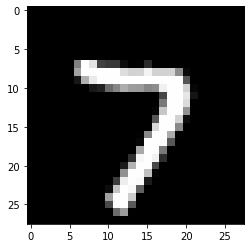

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap="gray");

In [ ]:
test_data=x_test[random].reshape(1,28,28,1)

In [ ]:
probability=model.predict(test_data)
probability

1/1 [==============================] - 0s 89ms/step


array([[5.3577351e-11, 4.3622836e-15, 7.2954129e-11, 3.0435757e-08,
        1.0473520e-14, 2.2200446e-15, 1.6910545e-23, 1.0000000e+00,
        7.2087881e-13, 3.1792901e-08]], dtype=float32)

In [ ]:
predicted_classes=np.argmax(probability)

In [ ]:
predicted_classes

7

CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Üstte yaptığımız işlemle drivedaki dosyalarımızı artık colabte kullanabileceğiz.

CNN ile Katı Atık Tespiti
1.   İş Problemleri (Business Problem)
2.   Veriyi Anlamak (Data Understanding)
3.   Veriyi Hazırlamak (Data Preparation)
4.   Modelleme (Modeling)
5.   Değerlendirme (Evaluation)


Gerekli kütüphanelerin import edilme işlemleri:

In [ ]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler:
import cv2
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns 
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
from urllib.request import urlopen

# Warningleri kapatma işlemi:
import warnings
warnings.filterwarnings("ignore")

# Model değerlendirme için kullanılacak olan kütüphaneler:
from sklearn.metrics import confusion_matrix, classification_report

# Model için kullanılacak olan kütüphaneler:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

Veri Setining Okunması:

1- Google Colab Notebook ile Google Drive hesabının eşleştirilmesi.

2- Veri setinin Google Drive a yüklenmesi ve adresinin Notebooka gösterilmesi.

3-Veri setini okuyacak fonksiyonun tanımlanması.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Drive da bu veri setinde yer alan görüntülerin olduğu path bilgisinin tutulması:
dir_path= "/content/drive/MyDrive/Garbage classification"

In [ ]:
# Target size ve Label Etiket Değerlerinin Belirlenmesi:
target_size=(224,224)

waste_labels={"cardboard":0, "glass":1, "metal":2, "paper":3, "plastic":4,"trash":5}

In [ ]:
def load_datasets(path):
  """
  Görsellerin bulunduğu dizindeki görüntüyü okuyup etiketlerini oluşturur.
  Parametreler:
  path: Görsellerin bulunduğu dizini ifade eder.
  Return:
  x: Görüntülere ait matris bilgilerini tutar.
  labels: Görüntünün ait olduğu sınıf bilgisini tutan liste.

  """
  
  x=[]
  labels=[]
  #Gönderdiğimiz pathdeki görüntüleri listeleyip sıralamaktadır.
  image_paths = sorted(list(paths.list_images(path)))

  for image_path in image_paths:
    # Belirtilen pathdeki görüntüler openCV kütüphanesi ile okunmaktadır.
    img=cv2.imread(image_path)

    # Okunan görüntüler başlangıçta belirlenen target_size a göre yeniden ölçeklendirilir.
    img=cv2.resize(img,target_size)

    # Ölçeklendirilen görüntüler x listesine eklenir.
    x.append(img)

    # Her bir path '/' ifadesi ile ayrıldığından dönen listenin sondan ikinci elemanı labelı temsil etmektedir.
    label=image_path.split(os.path.sep)[-2]

    # Yakalanan labelların sayısal değer karşılıklarının olduğu waste_labels sözlüğü içerisinden gönderilen key
    # değerine karşılık value değeri alınarak label oluşturulur.
    labels.append(waste_labels[label])

  # Veri seti random bir şekilde karıştırılır.
  x, labels=shuffle(x,labels, random_state=42)

  # Boyut ve sınıf bilgisi raporlanmaktadır.
  print(f"X boyutu: {np.array(x).shape}")
  print(f"Label sınıf sayısı: {len(np.unique(labels))} Gözlem sayısı: {len(labels)}")

  return x,labels

In [ ]:
x,labels=load_datasets(dir_path)

X boyutu: (2587, 224, 224, 3)
Label sınıf sayısı: 6 Gözlem sayısı: 2587


In [ ]:
# Görüntü boyutlarının tutulması:
input_shape = (np.array(x[0]).shape[1],np.array(x[0]).shape[1],3)
print(input_shape)

(224, 224, 3)


Veri Setinden Örnekler Görme:

In [ ]:
def visualize_img(image_batch, label_batch):
  """
  Veri seti içerisinden görüntü görselleştirir.

  Parametreler:
  
  image_batch: Görüntülere ait matris bilgilerini tutar.

  label_batch: Görüntünün ait olduğu sınıf bilgisini tutan liste.

  """

  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels,num_classes=6)[n]==1][0].title())
    plt.axis("off")

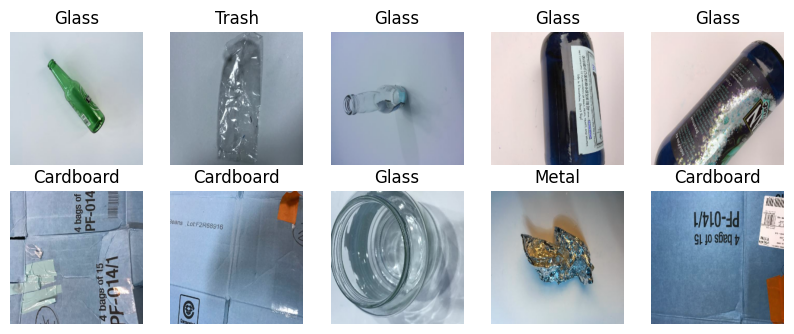

In [ ]:
visualize_img(x,labels)

Veriyi Hazırlama:

In [ ]:
# Train veri seti için bir generator tanımlıyoruz:
train = ImageDataGenerator(horizontal_flip = True,
                           vertical_flip=True,
                           validation_split=0.1,
                           rescale=1./255,
                           shear_range=0.1,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1
                           )

# Test veri seti için bir generator tanımlıyoruz.
test=ImageDataGenerator(rescale=1/225,
                        validation_split=0.1)

In [ ]:
train_generator=train.flow_from_directory(directory=dir_path,
                                          target_size=(target_size),
                                          class_mode="categorical",
                                          subset="training")
test_generator=test.flow_from_directory(directory=dir_path,
                                        target_size=(target_size),
                                        batch_size=251,
                                        class_mode="categorical",
                                        subset="validation")

Found 2330 images belonging to 6 classes.
Found 257 images belonging to 6 classes.


Modelleme

Sıfırdan CNN Modeli Kurma:
* Sequential 
* Evrişim Katmanı (Convolution Layer, Conv2D)
* Havuzlama Katmanı(Pooling Layer)
* Aktivasyon Fonksiyonu Katmanı (Avtivation Layer)
* Flattenşng Katmanı
* Dense Katmanı
* Dropout Katmanı



In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),padding="same", input_shape=(input_shape),activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.2))

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(rate=0.2))

model.add(Dense(units=6, activation="softmax"))

Model Özeti

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [ ]:
# Evrişim katmanları görüntüden özellik çıkarmak için kullanılan katmanlar,
# Pooling katmanları görüntüden özellik çıkarma işlemlerini destekleyen ara katmanlar,
# Flatten ile klasik bir sinir ağı yapısına geçiş yapıyoruz,
# Dropout ile de aşırı öğrenmenin önüne geçiyoruz,
# softmax ile de çıkış katmanımızı oluşturduk.

Optimizasyon ve Değerlendirme Metriklerinin Ayarlanması

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"acc"])

In [ ]:
# Aşırı öğrenmeyi engellemek için erken durdurma yöntemi:
callbacks = [EarlyStopping(monitor="val_loss",patience=50,verbose=1,mode="min"),
             ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss", mode="min",save_best_only=True, save_weights_only=False,verbose=1)]

Modelin Eğitilmesi

In [ ]:
history = model.fit_generator(generator=train_generator,
                               epochs=100,
                               validation_data=test_generator,
                               callbacks=callbacks,
                               workers=4,
                               steps_per_epoch=2330//32,
                               validation_steps=257//32)

Epoch 1/100
72/72 [==============================] - ETA: 0s - loss: 1.7504 - precision: 0.3438 - recall: 0.0048 - acc: 0.2211
Epoch 1: val_loss improved from inf to 1.62830, saving model to mymodel.h5
72/72 [==============================] - 56s 571ms/step - loss: 1.7504 - precision: 0.3438 - recall: 0.0048 - acc: 0.2211 - val_loss: 1.6283 - val_precision: 0.7727 - val_recall: 0.0661 - val_acc: 0.1984
Epoch 2/100
72/72 [==============================] - ETA: 0s - loss: 1.5779 - precision: 0.6349 - recall: 0.0870 - acc: 0.3307
Epoch 2: val_loss improved from 1.62830 to 1.41983, saving model to mymodel.h5
72/72 [==============================] - 40s 539ms/step - loss: 1.5779 - precision: 0.6349 - recall: 0.0870 - acc: 0.3307 - val_loss: 1.4198 - val_precision: 0.7463 - val_recall: 0.1946 - val_acc: 0.3813
Epoch 3/100
72/72 [==============================] - ETA: 0s - loss: 1.4657 - precision: 0.6831 - recall: 0.1388 - acc: 0.3816
Epoch 3: val_loss did not improve from 1.41983
72/72 [===

Değerlendirme(Evaluation)

In [ ]:
loss,precision, recall, acc=model.evaluate(test_generator, batch_size=32)

2/2 [==============================] - 2s 20ms/step - loss: 0.8491 - precision: 0.7742 - recall: 0.6537 - acc: 0.7121


In [ ]:
print(100*acc)
print(100*loss)
print(100*precision)
print(100*recall)

71.20622396469116
84.91050601005554
77.4193525314331
65.36964774131775


RNN

In [ ]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler:
import numpy as np 
import pandas as pd
import datetime as dt 
import tensorflow as tf 
import matplotlib.pyplot as plt 

# Model değerlendirme ve veriyi scale edebilmemiz için kullanılacak olan kütüphaneler:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Model için kullanılacak olan kütüphaneler:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Warningleri kapatmak için:
import warnings
warnings.filterwarnings('ignore')

# Tensorflow Warning Engelleme
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
df=pd.read_csv("international-airline-passengers.csv")  

In [ ]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [ ]:
df.columns=["Month","Passengers"]

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [ ]:
df.shape

(145, 2)

In [ ]:
df.dtypes

Month          object
Passengers    float64
dtype: object

In [ ]:
df.isnull().sum()

Month         0
Passengers    1
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


Veriyi Hazırlama

In [ ]:
df=df[:144]

In [ ]:
df.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df["Month"]=pd.to_datetime(df["Month"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [ ]:
df.index=df["Month"]

In [ ]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [ ]:
df.drop("Month",axis=1,inplace=True)

NameError: ignored

In [ ]:
df.head()

In [ ]:
result_df=df.copy()

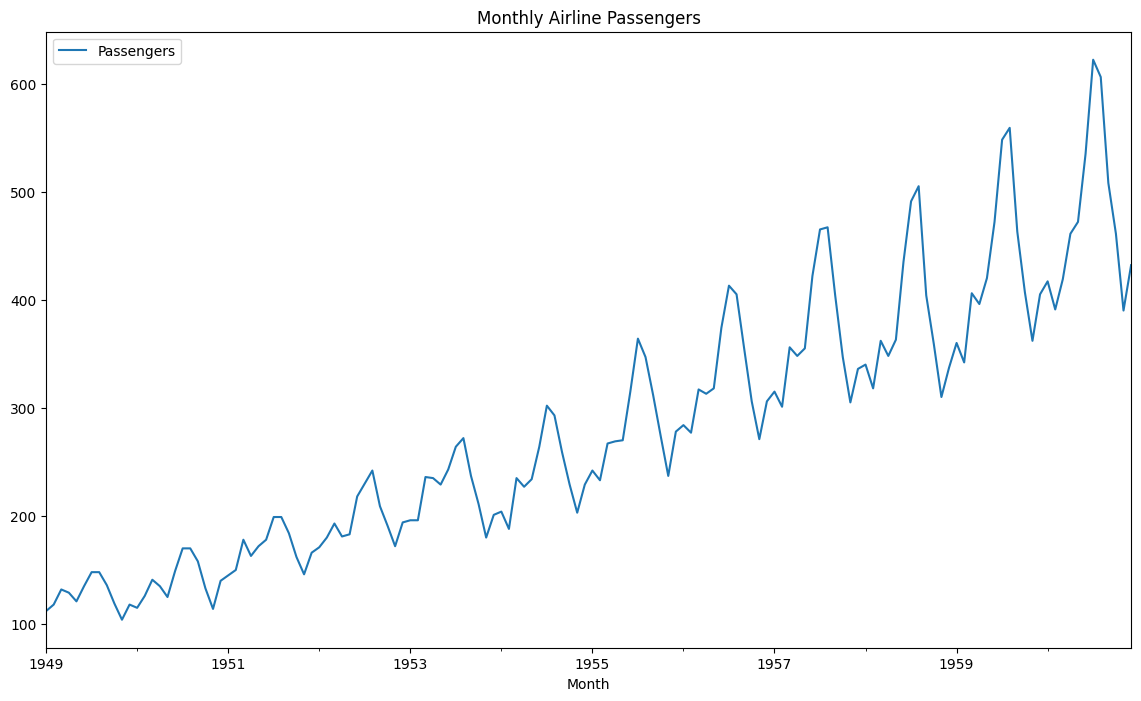

In [ ]:
df.plot(figsize=(14,8),title="Monthly Airline Passengers");

In [ ]:
data=df["Passengers"].values

In [ ]:
data[0:5]

array([112., 118., 132., 129., 121.])

In [ ]:
type(data[0:5])

numpy.ndarray

In [ ]:
type(data[0])

numpy.float64

In [ ]:
data=data.astype("float32")

In [ ]:
type(data[0])

numpy.float32

In [ ]:
data.shape

(144,)

In [ ]:
data=data.reshape(-1,1)

In [ ]:
data.shape

(144, 1)

In [ ]:
# Train tes setlerimizi zamana bağlı olarak kontrollü ayırıyoruz:

def split_data(dataframe,test_size):
  position=int(round(len(dataframe)*(1-test_size)))
  train=dataframe[:position]
  test=dataframe[position:]
  return train,test,position

In [ ]:
train,test,position=split_data(data,0.33)

In [ ]:
print(train.shape,test.shape)

(96, 1) (48, 1)


In [ ]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [ ]:
train=scaler_train.fit_transform(train)

In [ ]:
test=scaler_train.fit_transform(test)

In [ ]:
train[0:5]

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619]], dtype=float32)

In [ ]:
test[0:5]

array([[0.04361373],
       [0.        ],
       [0.17133951],
       [0.1464175 ],
       [0.16822433]], dtype=float32)

In [ ]:
def create_features(data, lookback):
  X, Y=[], []
  for i in range(lookback,len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])

  return np.array(X),np.array(Y)

In [ ]:
# Train Veri Seti
X_train, y_train=create_features(train,1)

In [ ]:
# Test Veri Seti
X_test, y_test=create_features(test,1)

In [ ]:
# RNN e gönderilecek yapı 3 boyutlu bir yapıda olması gerekiyor.
# reshape ile 3 boyutlu bir hale getireceğiz.

X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(95, 1, 1) (95, 1) (47, 1, 1) (47, 1)


Modelleme

In [ ]:
lookback=1
model=Sequential()

model.add(SimpleRNN(units=50,
                    activation="relu",
                    input_shape=(X_train.shape[1],lookback)))

model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimizasyon ve Değerlendirme Metrikleri Ayarlanması

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
           ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                           save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
history=model.fit(x=X_train,
                  y=y_train,
                  epochs=50,
                  batch_size=1,
                  validation_data=(X_test,y_test),
                  callbacks=callbacks,
                  shuffle=False)

Epoch 1/50
92/95 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 1: val_loss improved from inf to 0.03521, saving model to mymodel.h5
95/95 [==============================] - 6s 7ms/step - loss: 0.0113 - val_loss: 0.0352
Epoch 2/50
86/95 [==========================>...] - ETA: 0s - loss: 0.0149
Epoch 2: val_loss improved from 0.03521 to 0.02454, saving model to mymodel.h5
95/95 [==============================] - 1s 6ms/step - loss: 0.0152 - val_loss: 0.0245
Epoch 3/50
92/95 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 3: val_loss improved from 0.02454 to 0.02165, saving model to mymodel.h5
95/95 [==============================] - 1s 6ms/step - loss: 0.0104 - val_loss: 0.0216
Epoch 4/50
88/95 [==========================>...] - ETA: 0s - loss: 0.0097
Epoch 4: val_loss improved from 0.02165 to 0.02059, saving model to mymodel.h5
95/95 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0206
Epoch 5/50
93/95 [======================

Değerlendirme

In [ ]:
loss=model.evaluate(X_test,y_test,batch_size=1)
print(100*loss)

47/47 [==============================] - 0s 2ms/step - loss: 0.0208
2.084982208907604


In [ ]:
train_predict=model.predict(X_train)

3/3 [==============================] - 1s 4ms/step


In [ ]:
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_train.inverse_transform(test_predict)

In [ ]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_train.inverse_transform(y_test)

In [ ]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 14030370816.0
Test RMSE: 46.35068893432617


In [ ]:
# Bir hata var.

LSTM

Hisse Senedi Fiyat Tahminlemesi

In [ ]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler:
import numpy as np 
import pandas as pd
import datetime as dt 
import tensorflow as tf 
import matplotlib.pyplot as plt 

# Model değerlendirme ve veriyi scale edebilmemiz için kullanılacak olan kütüphaneler:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Model için kullanılacak olan kütüphaneler:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Warningleri kapatmak için:
import warnings
warnings.filterwarnings('ignore')

# Tensorflow Warning Engelleme
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
df=pd.read_csv("TSLA.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
def check_df(dataframe, head=5):
  print("############### Shape ###############")
  print(dataframe.shape)
  print("############### Types ###############")
  print(dataframe.dtypes)
  print("############### Head ###############")
  print(dataframe.head(head))
  print("############### NA ###############")
  print(dataframe.isnull().sum())
  print("############### Quantiles ###############")
  print(dataframe.quantile([0,0.05,0.50,0.95,0.99,1]).T)

In [ ]:
check_df(df)

############### Shape ###############
(2416, 7)
############### Types ###############
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
############### Head ###############
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
############### NA ###############
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
############### Quantiles ###############
                    0.00           0.05          0.50          0.95  \


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla_df=df[["Date","Close"]]

In [ ]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [ ]:
tesla_df.index=tesla_df["Date"]

In [ ]:
tesla_df.head()

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001


In [ ]:
tesla_df.drop("Date",axis=1,inplace=True)

In [ ]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [ ]:
result_df=tesla_df.copy()

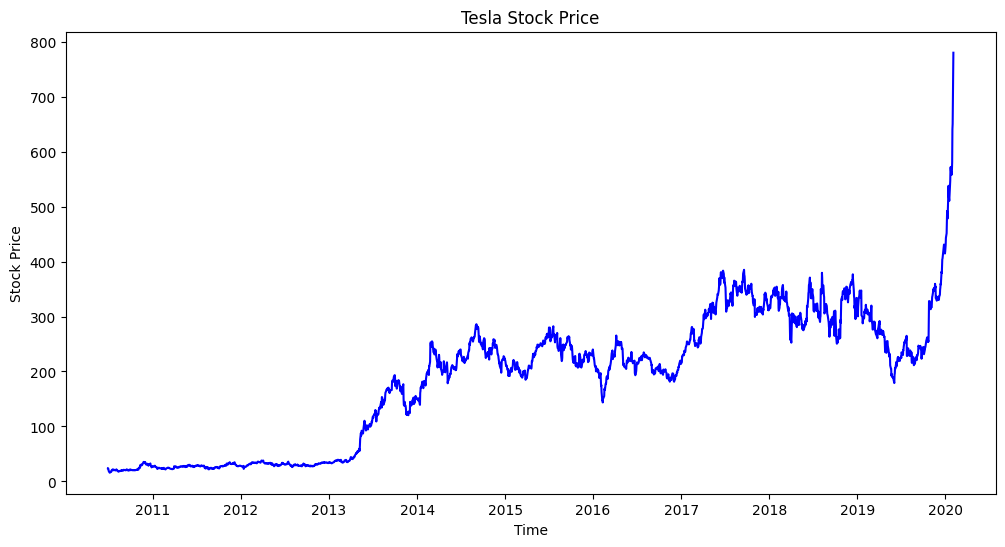

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tesla_df["Close"],color="blue")
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Tesla Stock Price")
plt.show()

In [ ]:
tesla_df=tesla_df.values

In [ ]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [ ]:
tesla_df=tesla_df.astype("float32")

In [ ]:
# Train-Test ayrımının yapılması

def split_data(dataframe, test_size):
  pos=int(round(len(dataframe)*(1-test_size)))
  train=dataframe[:pos]
  test=dataframe[pos:]
  return train,test,pos

In [ ]:
train,test,pos=split_data(tesla_df,0.20)

In [ ]:
print(train.shape,test.shape)

(1933, 1) (483, 1)


In [ ]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [ ]:
train=scaler_train.fit_transform(train)

In [ ]:
scaler_test=MinMaxScaler(feature_range=(0,1))

In [ ]:
test=scaler_test.fit_transform(test)

In [ ]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [ ]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [ ]:
def create_features(data,lookback):
  x,y=[],[]
  for i in range(lookback,len(data)):
    x.append(data[i-lookback:i,0])
    y.append(data[i,0])
  
  return np.array(x), np.array(y)

In [ ]:
lookback=20

In [ ]:
# Train veri seti
x_train, y_train=create_features(train,lookback)

#Test veri seti
x_test, y_test=create_features(test,lookback)


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


Modelleme

In [ ]:
model=Sequential()
model.add(LSTM(units=50,
               activation="relu",
               input_shape=(x_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 14,251
Trainable params: 14,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimizasyon ve Değerlendirme Metrikleri Ayarlanması

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
           ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                           save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
history=model.fit(x=x_train,
                  y=y_train,
                  epochs=100,
                  batch_size=20,
                  validation_data=(x_test,y_test),
                  callbacks=callbacks,
                  shuffle=False)

Epoch 1/100
87/96 [==========================>...] - ETA: 0s - loss: 0.0090
Epoch 1: val_loss improved from inf to 0.00391, saving model to mymodel.h5
96/96 [==============================] - 3s 7ms/step - loss: 0.0101 - val_loss: 0.0039
Epoch 2/100
94/96 [============================>.] - ETA: 0s - loss: 0.0068
Epoch 2: val_loss improved from 0.00391 to 0.00340, saving model to mymodel.h5
96/96 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 3/100
86/96 [=========================>....] - ETA: 0s - loss: 0.0059
Epoch 3: val_loss improved from 0.00340 to 0.00323, saving model to mymodel.h5
96/96 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 4/100
88/96 [==========================>...] - ETA: 0s - loss: 0.0048
Epoch 4: val_loss improved from 0.00323 to 0.00293, saving model to mymodel.h5
96/96 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0029
Epoch 5/100
96/96 [=================

In [ ]:
loss=model.evaluate(x_test,y_test,batch_size=20)
print(100*loss)

24/24 [==============================] - 0s 3ms/step - loss: 0.0024
0.23912694305181503


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [ ]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

In [ ]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
print(train_rmse)
print(test_rmse)

13.707319
29.390736


In [ ]:
train_prediction_df=result_df[lookback:pos]
train_prediction_df["Predicted"]=train_predict
train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,37.255974
2010-07-29,20.350000,37.255974
2010-07-30,19.940001,37.255974
2010-08-02,20.920000,37.255974
2010-08-03,21.950001,37.255974


In [ ]:
test_prediction_df=result_df[pos+lookback:]
test_prediction_df["Predicted"]=test_predict
test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,316.125366
2018-04-04,286.940002,313.496033
2018-04-05,305.720001,311.127136
2018-04-06,299.299988,311.047546
2018-04-09,289.660004,311.847473


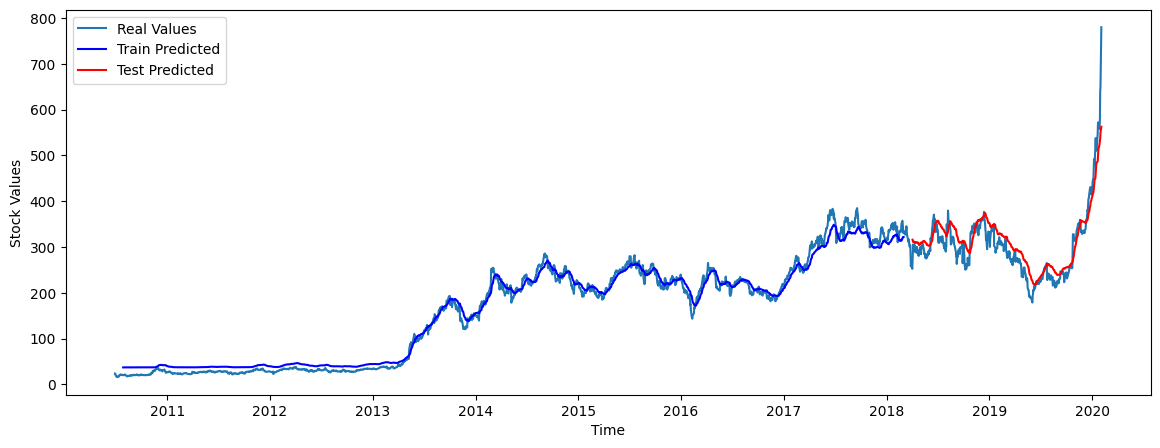

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(result_df,label="Real Values")
plt.plot(train_prediction_df["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_df["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()